# Linear Regression

In [43]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('AmesHousing.txt', sep='\t')

In [3]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [6]:
train_df = df.loc[0:1459]

In [7]:
train_df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,907253060,60,RL,NaN,10316,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,235000
1456,1457,907253110,60,RL,NaN,10400,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,230500
1457,1458,907254020,60,RL,73.0,9066,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,12,2008,WD,Normal,230000
1458,1459,907254090,60,RL,75.0,11404,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,222500


In [9]:
test_df = df.loc[1460:]

In [10]:
test_df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1460,1461,907255030,60,RL,NaN,9720,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,274000
1461,1462,907255060,20,RL,NaN,14860,Pave,NaN,IR2,Lvl,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,300000
1462,1463,907260010,60,RL,NaN,11250,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,255900
1463,1464,907262030,60,RL,65.0,8158,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,224900
1464,1465,907262060,60,RL,41.0,10905,Pave,NaN,IR2,Lvl,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,240000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            1460 non-null   int64  
 1   PID              1460 non-null   int64  
 2   MS SubClass      1460 non-null   int64  
 3   MS Zoning        1460 non-null   object 
 4   Lot Frontage     1211 non-null   float64
 5   Lot Area         1460 non-null   int64  
 6   Street           1460 non-null   object 
 7   Alley            109 non-null    object 
 8   Lot Shape        1460 non-null   object 
 9   Land Contour     1460 non-null   object 
 10  Utilities        1460 non-null   object 
 11  Lot Config       1460 non-null   object 
 12  Land Slope       1460 non-null   object 
 13  Neighborhood     1460 non-null   object 
 14  Condition 1      1460 non-null   object 
 15  Condition 2      1460 non-null   object 
 16  Bldg Type        1460 non-null   object 
 17  House Style   

In [13]:
target = 'SalePrice'

# Data vizualisation

In [14]:
import matplotlib.pyplot as plt

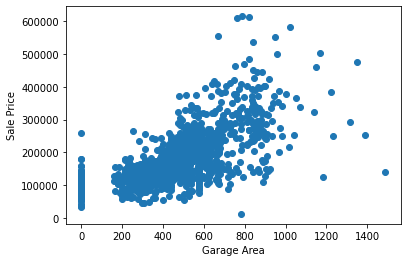

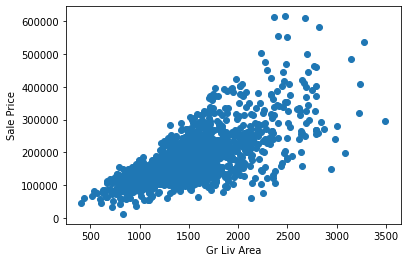

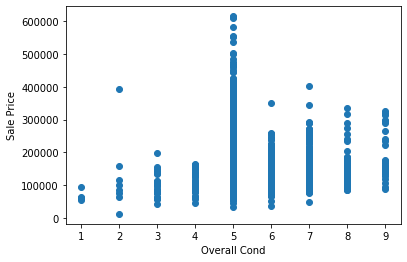

In [19]:
plt.scatter(x=train_df['Garage Area'], y=train_df[target])
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

plt.scatter(x=train_df['Gr Liv Area'], y=train_df[target])
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price')
plt.show()

plt.scatter(x=train_df['Overall Cond'], y=train_df[target])
plt.xlabel('Overall Cond')
plt.ylabel('Sale Price')
plt.show()

### Correlation between caracteristics

In [18]:
train_df[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr()

,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.465366,-0.132401,0.662397
Gr Liv Area,0.465366,1.000000,-0.133710,0.698990
Overall Cond,-0.132401,-0.133710,1.000000,-0.099395
SalePrice,0.662397,0.698990,-0.099395,1.000000


In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_df[['Gr Liv Area']], train_df['SalePrice'])

a1 = lr.coef_
a0 = lr.intercept_

print('a1 : ',a1)
print('a0 : ',a0)

a1 :  [116.86624683]
a0 :  5366.821710056043


# Prediction

In [24]:
train_predictions = lr.predict(train_df[['Gr Liv Area']])
test_predictions = lr.predict(test_df[['Gr Liv Area']])

# Errors

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

train_mse = mean_squared_error(train_df['SalePrice'], train_predictions)
test_mse = mean_squared_error(test_df['SalePrice'], test_predictions)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [27]:
print(train_rmse)
print(test_rmse)

56034.362001412796
57088.25161263909


# Multiple linear regression

In [30]:
features = ['Gr Liv Area', 'Overall Cond']
lr.fit(train_df[features], train_df['SalePrice'])

train_predictions = lr.predict(train_df[features])
test_predictions = lr.predict(test_df[features])

train_mse = mean_squared_error(train_df['SalePrice'], train_predictions)
test_mse = mean_squared_error(test_df['SalePrice'], test_predictions)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [31]:
print(train_rmse)
print(test_rmse)

56032.398015258674
57066.907794485596


In [36]:
test_df.loc[test_df['Garage Area'].isnull()]['Garage Area']

2236   NaN
Name: Garage Area, dtype: float64

In [37]:
test_df['Garage Area'].mean()

472.28182437031995

In [44]:
test_df['Garage Area'] = test_df['Garage Area'].fillna(test_df['Garage Area'].mean())

In [45]:
test_df['Garage Area'].isnull().sum()

0

In [46]:
features = ['Gr Liv Area', 'Garage Area']
lr.fit(train_df[features], train_df['SalePrice'])

train_predictions = lr.predict(train_df[features])
test_predictions = lr.predict(test_df[features])

train_mse = mean_squared_error(train_df['SalePrice'], train_predictions)
test_mse = mean_squared_error(test_df['SalePrice'], test_predictions)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [47]:
print(train_rmse)
print(test_rmse)

47426.32228024743
51785.77475253002


# Features selection

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            1460 non-null   int64  
 1   PID              1460 non-null   int64  
 2   MS SubClass      1460 non-null   int64  
 3   MS Zoning        1460 non-null   object 
 4   Lot Frontage     1211 non-null   float64
 5   Lot Area         1460 non-null   int64  
 6   Street           1460 non-null   object 
 7   Alley            109 non-null    object 
 8   Lot Shape        1460 non-null   object 
 9   Land Contour     1460 non-null   object 
 10  Utilities        1460 non-null   object 
 11  Lot Config       1460 non-null   object 
 12  Land Slope       1460 non-null   object 
 13  Neighborhood     1460 non-null   object 
 14  Condition 1      1460 non-null   object 
 15  Condition 2      1460 non-null   object 
 16  Bldg Type        1460 non-null   object 
 17  House Style   

In [49]:
numerical_train = train_df.select_dtypes(include=[int, float])

In [50]:
numerical_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            1460 non-null   int64  
 1   PID              1460 non-null   int64  
 2   MS SubClass      1460 non-null   int64  
 3   Lot Frontage     1211 non-null   float64
 4   Lot Area         1460 non-null   int64  
 5   Overall Qual     1460 non-null   int64  
 6   Overall Cond     1460 non-null   int64  
 7   Year Built       1460 non-null   int64  
 8   Year Remod/Add   1460 non-null   int64  
 9   Mas Vnr Area     1449 non-null   float64
 10  BsmtFin SF 1     1459 non-null   float64
 11  BsmtFin SF 2     1459 non-null   float64
 12  Bsmt Unf SF      1459 non-null   float64
 13  Total Bsmt SF    1459 non-null   float64
 14  1st Flr SF       1460 non-null   int64  
 15  2nd Flr SF       1460 non-null   int64  
 16  Low Qual Fin SF  1460 non-null   int64  
 17  Gr Liv Area   

In [51]:
removed_columns = [
    'PID',
    'Year Built',
    'Year Remod/Add',
    'Garage Yr Blt',
    'Mo Sold',
    'Yr Sold'
]

numerical_train = numerical_train.drop(columns=removed_columns)

In [52]:
numerical_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            1460 non-null   int64  
 1   MS SubClass      1460 non-null   int64  
 2   Lot Frontage     1211 non-null   float64
 3   Lot Area         1460 non-null   int64  
 4   Overall Qual     1460 non-null   int64  
 5   Overall Cond     1460 non-null   int64  
 6   Mas Vnr Area     1449 non-null   float64
 7   BsmtFin SF 1     1459 non-null   float64
 8   BsmtFin SF 2     1459 non-null   float64
 9   Bsmt Unf SF      1459 non-null   float64
 10  Total Bsmt SF    1459 non-null   float64
 11  1st Flr SF       1460 non-null   int64  
 12  2nd Flr SF       1460 non-null   int64  
 13  Low Qual Fin SF  1460 non-null   int64  
 14  Gr Liv Area      1460 non-null   int64  
 15  Bsmt Full Bath   1459 non-null   float64
 16  Bsmt Half Bath   1459 non-null   float64
 17  Full Bath     

In [55]:
null_series = numerical_train.isnull().sum()

In [56]:
null_series

Order                0
MS SubClass          0
Lot Frontage       249
Lot Area             0
Overall Qual         0
Overall Cond         0
Mas Vnr Area        11
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       1
Bsmt Half Bath       1
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
SalePrice            0
dtype: int64

In [57]:
full_col_series = null_series[null_series == 0]

In [58]:
full_col_series

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64

In [59]:
train_subset = train_df[full_col_series.index]

In [60]:
train_subset

,Order,MS SubClass,Lot Area,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
0,1,20,31770,6,5,1656,0,0,1656,1,...,2.0,528.0,210,62,0,0,0,0,0,215000
1,2,20,11622,5,6,896,0,0,896,1,...,1.0,730.0,140,0,0,0,120,0,0,105000
2,3,20,14267,6,6,1329,0,0,1329,1,...,1.0,312.0,393,36,0,0,0,0,12500,172000
3,4,20,11160,7,5,2110,0,0,2110,2,...,2.0,522.0,0,0,0,0,0,0,0,244000
4,5,60,13830,5,5,928,701,0,1629,2,...,2.0,482.0,212,34,0,0,0,0,0,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,10316,7,5,992,873,0,1865,2,...,3.0,839.0,0,184,0,0,0,0,0,235000
1456,1457,60,10400,7,5,1290,871,0,2161,2,...,2.0,570.0,0,84,0,0,0,0,0,230500
1457,1458,60,9066,8,5,1004,848,0,1852,2,...,3.0,660.0,224,106,0,0,0,0,0,230000
1458,1459,60,11404,7,5,1153,878,0,2031,2,...,2.0,541.0,192,84,0,0,0,0,0,222500


In [61]:
corrmat = train_subset.corr()

In [62]:
sorted_corr = corrmat['SalePrice'].abs().sort_values()

In [63]:
sorted_corr

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64

## Heatmap to see correlation between columns

In [65]:
import seaborn

In [66]:
strong_corrs = sorted_corr[sorted_corr > 0.3]

In [67]:
strong_corrs

Wood Deck SF     0.319104
Open Porch SF    0.344383
TotRms AbvGrd    0.483701
Fireplaces       0.485683
Full Bath        0.518194
1st Flr SF       0.657119
Garage Area      0.662397
Garage Cars      0.663485
Gr Liv Area      0.698990
Overall Qual     0.804562
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [71]:
corrmat = train_subset[strong_corrs.index].corr()

<AxesSubplot:>

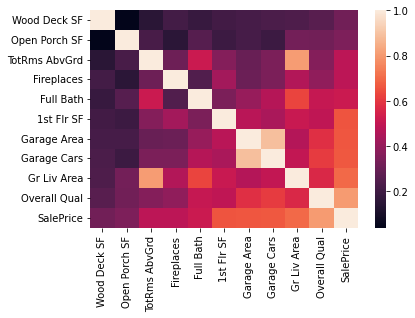

In [72]:
seaborn.heatmap(corrmat)

# Heatmap analyze

In [81]:
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])

In [82]:
test_df[final_corr_cols.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Wood Deck SF   1470 non-null   int64  
 1   Open Porch SF  1470 non-null   int64  
 2   Fireplaces     1470 non-null   int64  
 3   Full Bath      1470 non-null   int64  
 4   1st Flr SF     1470 non-null   int64  
 5   Garage Area    1470 non-null   float64
 6   Gr Liv Area    1470 non-null   int64  
 7   Overall Qual   1470 non-null   int64  
 8   SalePrice      1470 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 103.5 KB


# Train and test model

In [83]:
test_subset = test_df[final_corr_cols.index]

In [84]:
test_subset

,Wood Deck SF,Open Porch SF,Fireplaces,Full Bath,1st Flr SF,Garage Area,Gr Liv Area,Overall Qual,SalePrice
1460,168,116,1,2,1366,725.0,1947,9,274000
1461,182,35,1,2,1786,715.0,1786,8,300000
1462,0,0,1,2,1149,779.0,2290,8,255900
1463,0,63,0,2,884,543.0,1768,7,224900
1464,0,57,1,2,1129,596.0,2327,7,240000
...,...,...,...,...,...,...,...,...,...
2925,120,0,0,1,1003,588.0,1003,6,142500
2926,164,0,0,1,902,484.0,902,5,131000
2927,80,32,0,1,970,0.0,970,5,132000
2928,240,38,1,1,1389,418.0,1389,5,170000


In [85]:
clean_test = test_subset.dropna()

In [86]:
clean_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Wood Deck SF   1470 non-null   int64  
 1   Open Porch SF  1470 non-null   int64  
 2   Fireplaces     1470 non-null   int64  
 3   Full Bath      1470 non-null   int64  
 4   1st Flr SF     1470 non-null   int64  
 5   Garage Area    1470 non-null   float64
 6   Gr Liv Area    1470 non-null   int64  
 7   Overall Qual   1470 non-null   int64  
 8   SalePrice      1470 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 114.8 KB


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

features = final_corr_cols.drop(['SalePrice']).index

In [90]:
features

Index(['Wood Deck SF', 'Open Porch SF', 'Fireplaces', 'Full Bath',
       '1st Flr SF', 'Garage Area', 'Gr Liv Area', 'Overall Qual'],
      dtype='object')

In [92]:
lr = LinearRegression()
lr.fit(train_df[features], train_df['SalePrice'])
train_predictions = lr.predict(train_df[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_df['SalePrice'], train_predictions)
test_mse = mean_squared_error(clean_test['SalePrice'], test_predictions)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

34173.97629185851
41018.06917797537


In [93]:
clean_test['SalePrice'].mean()

181976.36394557822

In [94]:
(test_rmse/clean_test['SalePrice'].mean())*100

22.540327924258456

# Resizing columns

In [95]:
unit_train = (train_df[features] - train_df[features].min())/(train_df[features].max() - train_df[features].min())

In [96]:
unit_train.min()

Wood Deck SF     0.0
Open Porch SF    0.0
Fireplaces       0.0
Full Bath        0.0
1st Flr SF       0.0
Garage Area      0.0
Gr Liv Area      0.0
Overall Qual     0.0
dtype: float64

In [97]:
unit_train.max()

Wood Deck SF     1.0
Open Porch SF    1.0
Fireplaces       1.0
Full Bath        1.0
1st Flr SF       1.0
Garage Area      1.0
Gr Liv Area      1.0
Overall Qual     1.0
dtype: float64

In [98]:
sorted_vars = unit_train.var().sort_values()
print(sorted_vars)

Open Porch SF    0.013938
Full Bath        0.018621
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64


# Final Model

In [101]:
features = sorted_vars[sorted_vars > 0.015].index

In [102]:
features

Index(['Full Bath', 'Garage Area', 'Gr Liv Area', 'Overall Qual', '1st Flr SF',
       'Wood Deck SF', 'Fireplaces'],
      dtype='object')

In [103]:
final_lr = LinearRegression()
final_lr.fit(train_df[features], train_df['SalePrice'])

train_predictions = final_lr.predict(train_df[features])
test_predictions = final_lr.predict(clean_test[features])

train_mse = mean_squared_error(train_df['SalePrice'], train_predictions)
test_mse = mean_squared_error(clean_test['SalePrice'], test_predictions)

train_rmse2 = np.sqrt(train_mse)
test_rmse2 = np.sqrt(test_mse)

print(train_rmse2)
print(test_rmse2)

34372.696707783965
40577.71081356285


In [104]:
(test_rmse2/clean_test['SalePrice'].mean())*100

22.29834135256049

In [105]:
final_lr.coef_

array([-2221.97281278,    64.88085639,    38.71125489, 24553.18365123,
          43.18536387,    37.88152677,  7086.98429942])

In [106]:
final_lr.intercept_

-112764.87061464888